# 神经网络

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [2]:
import numpy as np

def step_function(x):
    y = x > 0
    return y.astype(int)

step_function(np.array([-4, 2]))

array([0, 1])

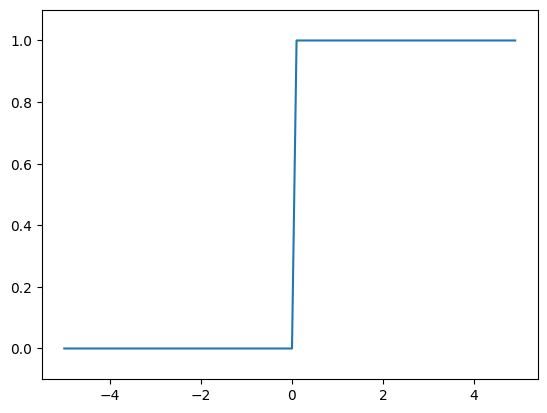

In [3]:
import matplotlib.pylab as plt

def step_function (x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5, 5, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

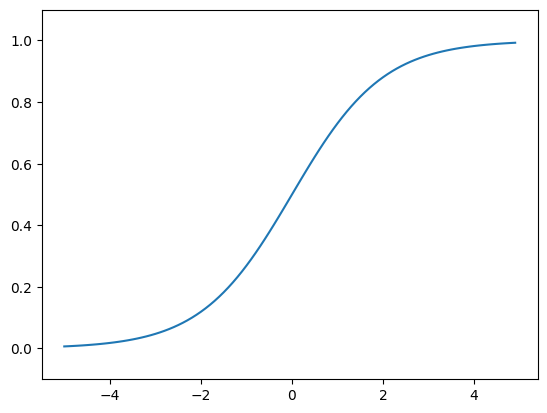

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

问什么激活函数不能使用线性函数？

In [5]:
def relu(x):
    return np.maximum(0, x)

## 多维数组的运算

In [6]:
a = np.array([1, 2, 3, 4])
a

array([1, 2, 3, 4])

In [7]:
np.ndim(a)

1

In [8]:
np.shape(a)

(4,)

In [9]:
a.shape[0]

4

In [10]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [11]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def identity_function(x):
    return x

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a2 = np.dot(z2, W3) + b3
    y =  identity_function(a2)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)

y

array([0.31682708, 0.69627909])

In [12]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    
    return exp_a / sum_exp_a

softmax(np.array([0.1, 0.4, 0.7]))

array([0.23969448, 0.3235537 , 0.43675182])

In [13]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    
    return exp_a / sum_exp_a

softmax(np.array([0.4, 0.5, 0.1]))

array([0.35137169, 0.38832577, 0.26030255])

## 手写数字识别

机器学习： 学习 -> 推理

In [14]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [15]:
import numpy as np
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
img = x_train[0]
label = t_train[0]

print(label)
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [16]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("./ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a2 = np.dot(z2, W3) + b3
    y =  softmax(a2)
    
    return y

x, t = get_data()
network = init_network()

accuracy_cut = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cut += 1
        
print('Accuracy: ' + str(float(accuracy_cut) / len(x)))

Accuracy: 0.9352
